$\color{steelblue}{\underline{\text{Minería de Datos}}}$ 

$\color{steelblue}{\underline{\text{Tarea 1 - Solución}}}$ 

By Nibaldo Pino Araya.

<n.pino@uc.cl>


In [9]:
# Tratamiento de DataFrames
import numpy as np
import pandas as pd


# librerias para graficar
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('seaborn-white')
#plt.style.use('ggplot')


# Control de Warnings
import warnings
warnings.filterwarnings("ignore")


# Embellecimiento de Textos
from IPython.display import display, Markdown

# Info Sistema
import os

# Opciones Generales
pd.set_option("display.max_rows", 112)
pd.set_option("display.max_info_columns", 112)
pd.set_option("display.max_colwidth", 3000)

# PROBLEMA 1

In [2]:
features = pd.read_csv('./Features.csv')
sales = pd.read_csv('./sales.csv')
stores = pd.read_csv('./stores.csv')

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
features.shape

(8190, 12)

In [5]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
sales.shape

(421570, 5)

In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
stores.shape

(45, 3)

## _A_

$$celsius = \frac {5 (32 \cdot Fahrenheit -32)} {9}$$
$$Litro = \frac{Galon} {4.55}$$
$$mt^2 = \frac{ft^2}{10.764}$$

In [9]:
# Temperatura de °F a °C
features['Temp_Celsius'] = (features['Temperature']-32)*5/9

In [10]:
# Fuel_Price: Precio en $ por litro
features['Fuel_Price_litre'] = features['Fuel_Price']/4.55

In [11]:
# Size Stores pie2 to metro2
stores['Size_meters2'] = stores['Size'] * 0.092903

## _B_

In [12]:
# Ventas totales y promedio por tienda y semana
sales.groupby(['Store', 'Date']).agg({'Weekly_Sales': [np.sum, np.mean]}).reset_index().sort_values([('Weekly_Sales', 'mean')], ascending = False)

Store        Date Weekly_Sales              
                                sum          mean
1971    14  24/12/2010   3818686.45  54552.663571
2829    20  24/12/2010   3766687.43  51598.457945
1399    10  24/12/2010   3749057.69  51356.954658
536      4  23/12/2011   3676388.98  51060.958056
541      4  24/12/2010   3526713.39  49672.019577
...    ...         ...          ...           ...
641      5  15/10/2010    280681.20   4385.643750
637      5  14/10/2011    286117.72   4335.116970
667      5  21/01/2011    275313.34   4301.770938
690      5  26/02/2010    270281.63   4158.178923
634      5  14/01/2011    260636.71   4072.448594

[6435 rows x 4 columns]

In [13]:
# Razon de Venta Feriado vs Normal
Feriado = sales[sales['IsHoliday']==True].groupby(['Store'])['Weekly_Sales'].mean().reset_index().rename(columns={"Weekly_Sales":"Feriado"})
No_Feriado = sales[sales['IsHoliday']==False].groupby(['Store'])['Weekly_Sales'].mean().reset_index().rename(columns={"Weekly_Sales":"No_Feriado"})

sales_compare = pd.merge(Feriado,No_Feriado)
sales_compare.head()

,Store,Feriado,No_Feriado
0,1,23039.386667,21609.634733
1,2,28798.710526,26753.864227
2,3,6916.446288,6332.098604
3,4,30854.231417,29032.260570
4,5,5617.212609,5010.249172


In [14]:
sales_compare['Razon'] = sales_compare.Feriado / sales_compare.No_Feriado
sales_compare.sort_values(['Razon'], ascending =True).head(10)

,Store,Feriado,No_Feriado,Razon
35,36,8412.829062,8597.374014,0.978535
43,44,5932.577174,6046.886331,0.981096
36,37,10170.842685,10306.767529,0.986812
37,38,7480.585843,7493.363637,0.998295
29,30,8772.275241,8763.636535,1.000986
42,43,13473.438093,13410.729834,1.004676
32,33,5796.788499,5723.280870,1.012844
41,42,11680.949753,11425.515827,1.022356
31,32,16789.178285,16318.545633,1.028840
39,40,14197.663028,13730.522084,1.034022


## _C_

In [15]:
df_type = pd.merge(sales, stores, how = 'left', on = 'Store')
df_type = df_type.groupby(['Type', 'Date'])['Weekly_Sales'].mean().reset_index()
df_type['Date'] = pd.to_datetime(df_type['Date'])
df_type.head()

,Type,Date,Weekly_Sales
0,A,2011-01-04,18501.838896
1,A,2012-01-06,20888.924125
2,A,2011-01-07,20524.318121
3,A,2010-01-10,18152.745779
4,A,2012-02-03,19768.331817


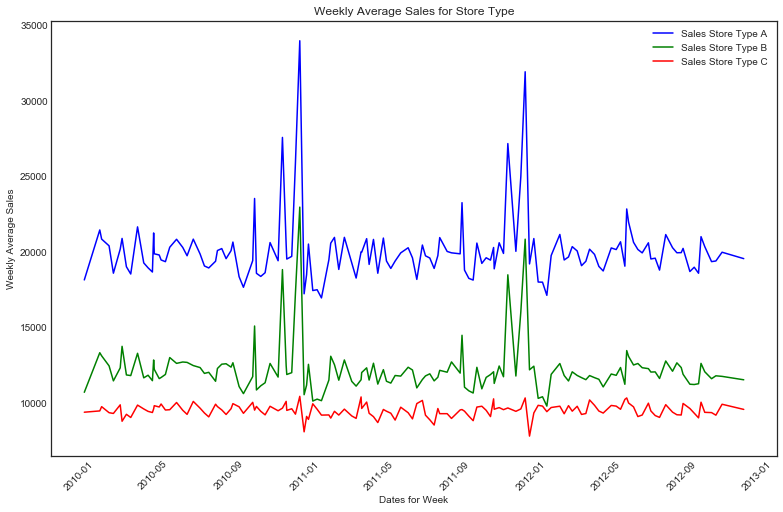

In [16]:
# Generate Data
df_type_a = df_type.where(df_type['Type'] == 'A').sort_values('Date', ascending = True).dropna()
df_type_b = df_type.where(df_type['Type'] == 'B').sort_values('Date', ascending = True).dropna()
df_type_c = df_type.where(df_type['Type'] == 'C').sort_values('Date', ascending = True).dropna()

time_a = df_type_a['Date']
time_b = df_type_b['Date']
time_c = df_type_c['Date']

y_a = df_type_a['Weekly_Sales']
y_b = df_type_b['Weekly_Sales']
y_c = df_type_c['Weekly_Sales']

# Plot things...

fig = plt.figure(figsize=(13,8))
plt.plot(time_a, y_a, 'b-')
plt.plot(time_b, y_b, 'g-')
plt.plot(time_c, y_c, 'r-')
plt.xticks(rotation=45)
plt.legend(('Sales Store Type A', 'Sales Store Type B', 'Sales Store Type C'))
plt.xlabel('Dates for Week')
plt.ylabel('Weekly Average Sales')
plt.title('Weekly Average Sales for Store Type')
plt.show();

## _D_

In [17]:
# Data Agrupada
total_sales = sales.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index().rename(columns={"Weekly_Sales":"Total_Sales"})
print(total_sales.shape)

features_selec = features.loc[:,['Store', 'Date', 'CPI', 'Temp_Celsius', 'Unemployment',  'Fuel_Price_litre']]
print(features_selec.shape)

df_features = pd.merge(features_selec, total_sales, how = 'left', on = ['Store', 'Date']).dropna()
print(df_features.shape)

(6435, 3)
(8190, 6)
(6435, 7)


In [36]:
df_features

,Store,Date,CPI,Temp_Celsius,Unemployment,Fuel_Price_litre,Total_Sales
0,1,05/02/2010,211.096358,5.727778,8.106,0.565275,1643690.90
1,1,12/02/2010,211.242170,3.616667,8.106,0.560000,1641957.44
2,1,19/02/2010,211.289143,4.405556,8.106,0.552527,1611968.17
3,1,26/02/2010,211.319643,8.127778,8.106,0.562857,1409727.59
4,1,05/03/2010,211.350143,8.055556,8.106,0.576923,1554806.68
...,...,...,...,...,...,...,...
8146,45,28/09/2012,192.013558,18.266667,8.684,0.878462,713173.95
8147,45,05/10/2012,192.170412,18.272222,8.667,0.875824,733455.07
8148,45,12/10/2012,192.327265,12.483333,8.667,0.879121,734464.36
8149,45,19/10/2012,192.330854,13.594444,8.667,0.872308,718125.53


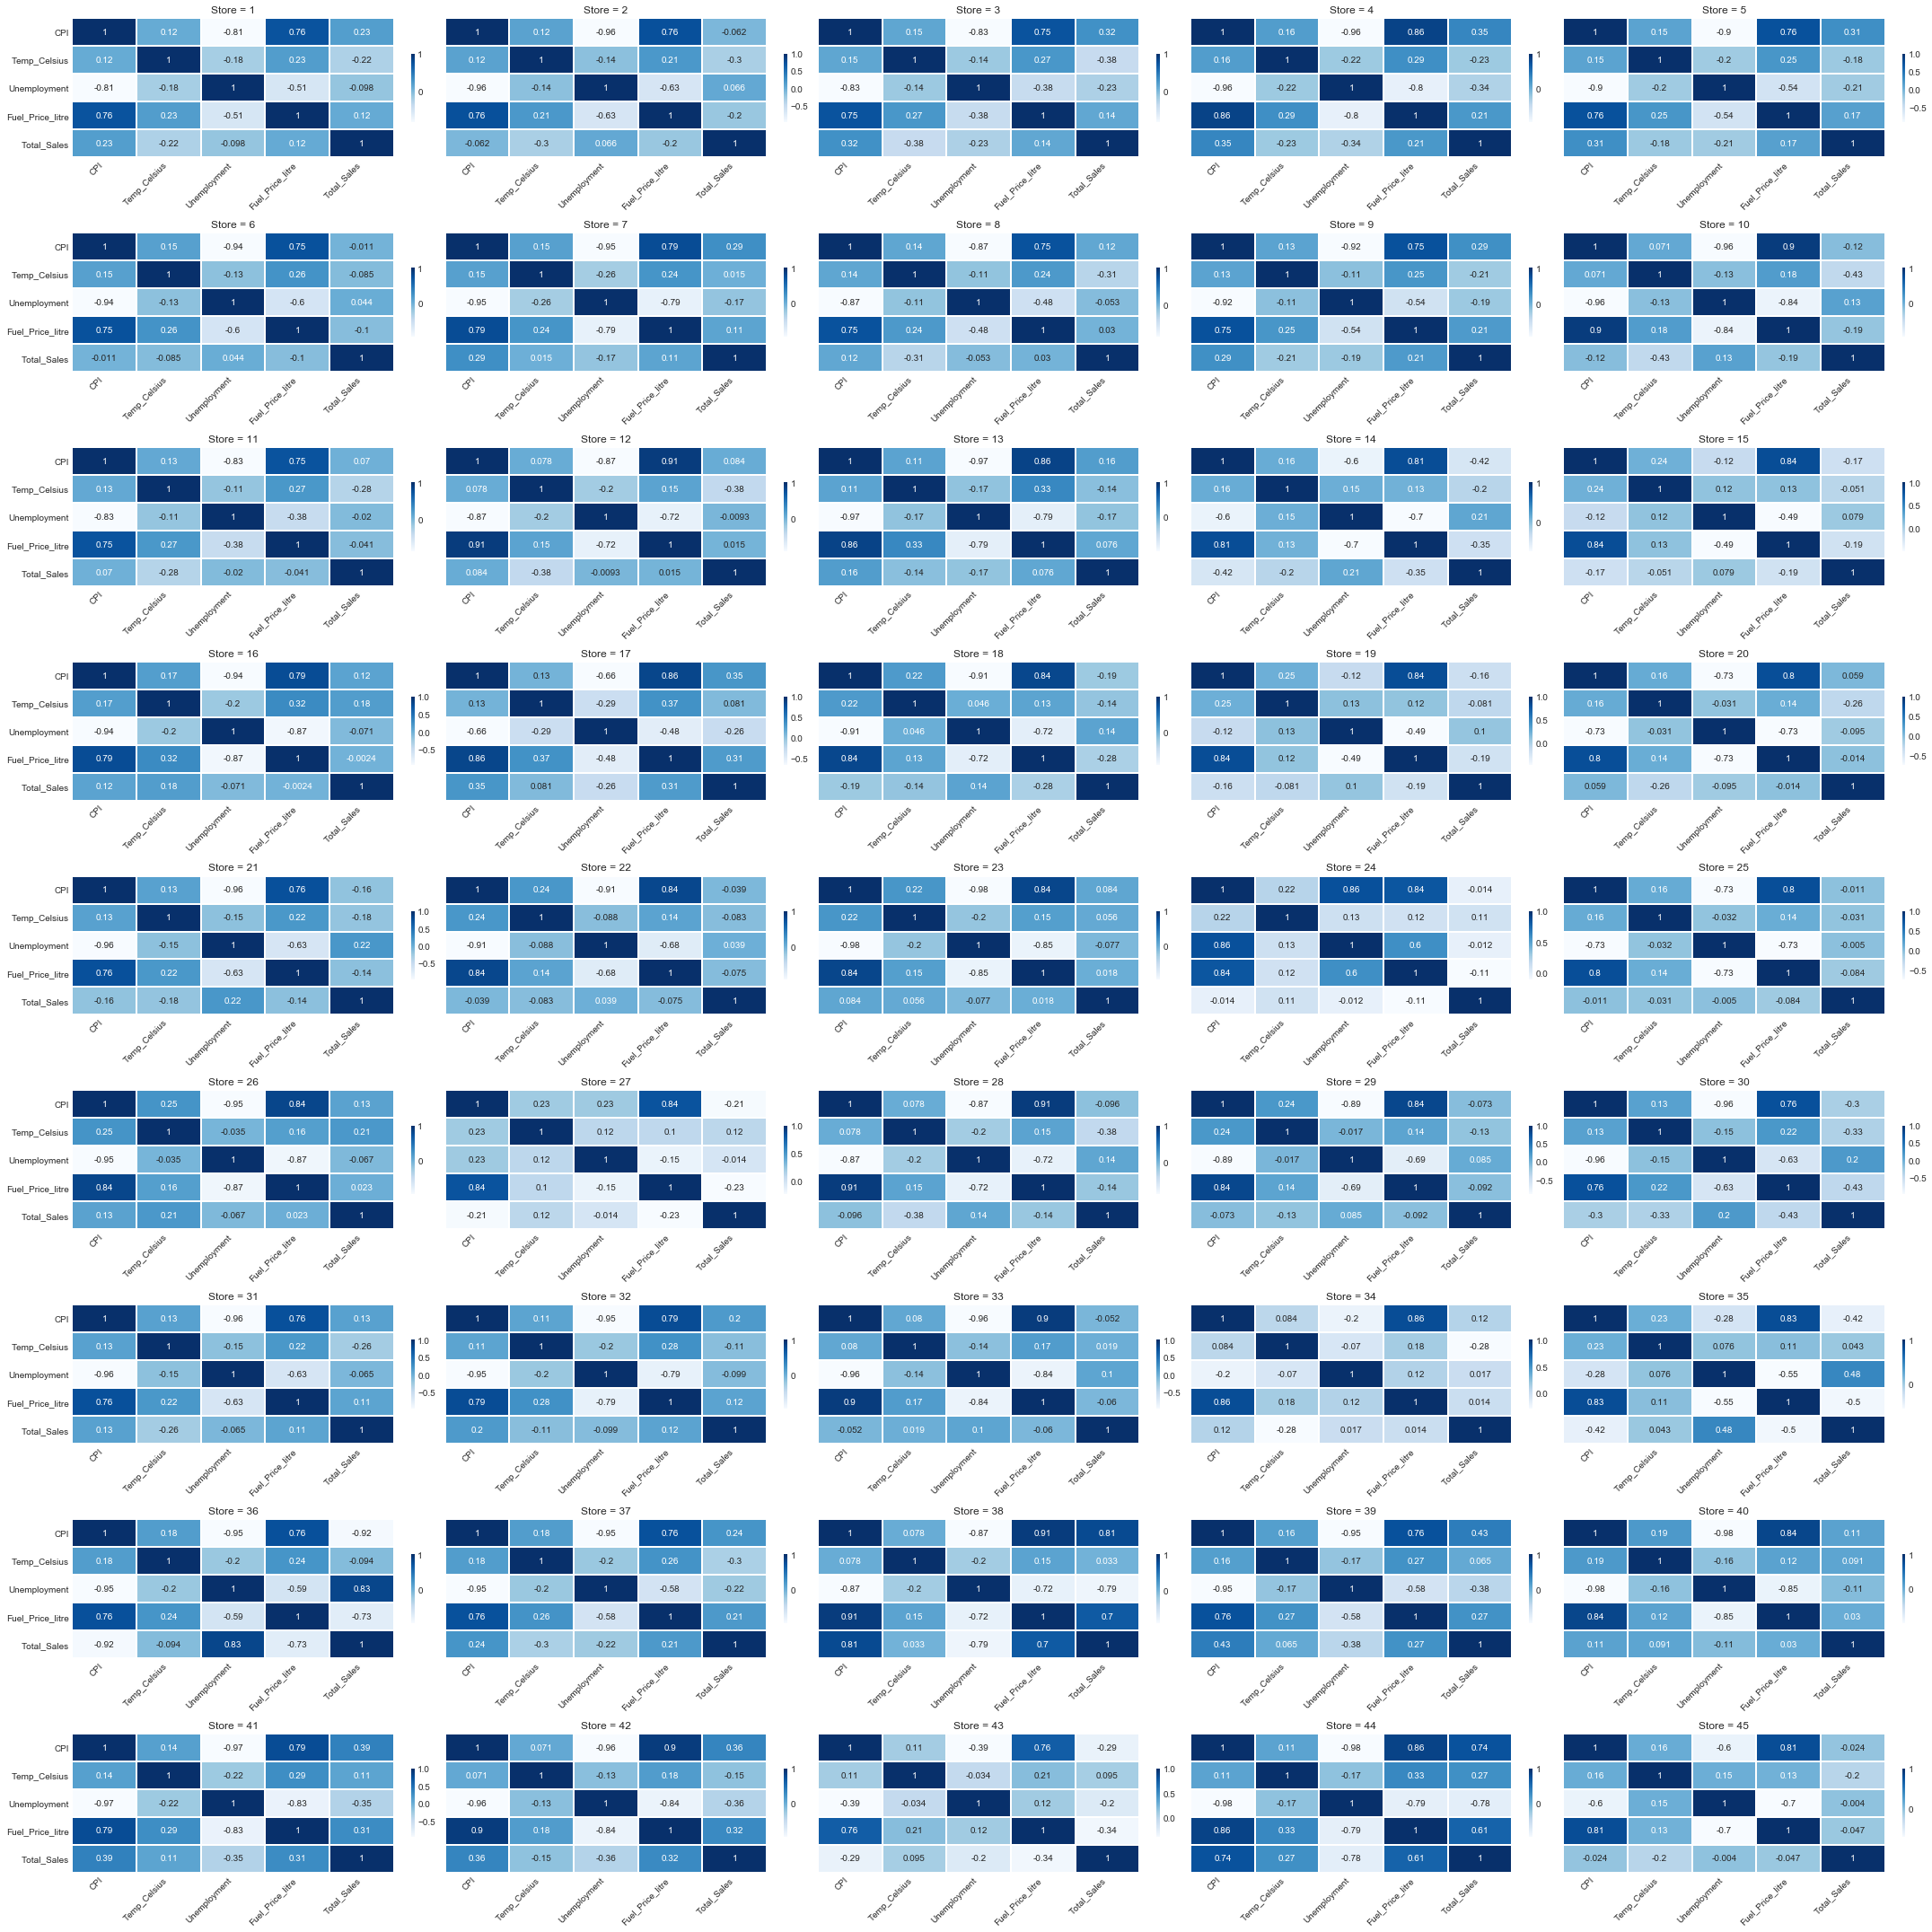

In [94]:
#Heatmap por Store
grouped = df_features.groupby('Store')
rowlength = int(grouped.ngroups/9)

Corr_Store = [] #Almacena la matrix de correlacion para cada Store

fig, axs = plt.subplots(figsize = (30,30), nrows = 9, ncols = rowlength)

targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    Corr_Store.append(grouped.get_group(key).iloc[:,2:].corr())
    g = sns.heatmap(grouped.get_group(key).iloc[:,2:].corr(),
                    cmap = 'Blues',
                    annot = True,
                    cbar_kws = {'fraction' : 0.01},
                    linewidth = 1,
                    ax = ax,
                    xticklabels = (i >= 0),
                    yticklabels = (i%rowlength==0),
                    cbar = True)
    g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title('Store = %d'%key)
    
    #plt.xticks(rotation = 45)
#plt.subplots_adjust(bottom=0.1, wspace = 0.25, hspace = 0.25)
plt.tight_layout()
plt.show();

In [81]:
# Matriz de Correlaciones para Store 1
df_fil = df_features.query('Store == 1')
features_corr = df_fil.iloc[:,2:].corr()
features_corr

,CPI,Temp_Celsius,Unemployment,Fuel_Price_litre,Total_Sales
CPI,1.000000,0.118503,-0.813471,0.755259,0.225408
Temp_Celsius,0.118503,1.000000,-0.180695,0.228493,-0.222701
Unemployment,-0.813471,-0.180695,1.000000,-0.513944,-0.097955
Fuel_Price_litre,0.755259,0.228493,-0.513944,1.000000,0.124592
Total_Sales,0.225408,-0.222701,-0.097955,0.124592,1.000000


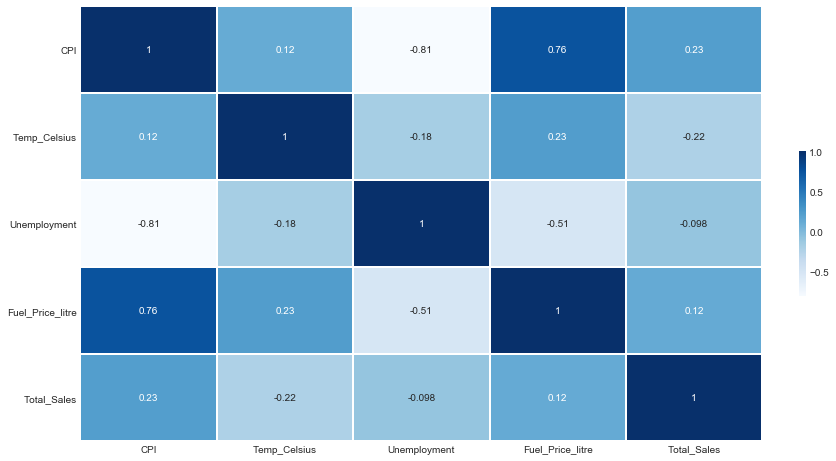

In [95]:
# Heatmap
fig, ax = plt.subplots(figsize=(13,8))
p = sns.heatmap(features_corr,
                cmap='Blues',
                annot=True,
                cbar_kws = {'fraction' : 0.01},
                linewidth = 1,
                ax=ax)
plt.yticks(rotation = 0);

## _E_

In [96]:
# Ajuste de DF para generar Forecast
df_forecast = sales.loc[:,['Store', 'Dept', 'Date', 'Weekly_Sales']]
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])
df_forecast = df_forecast.sort_values(['Store', 'Dept', 'Date'], ascending =True).reset_index(drop=True)
df_forecast.set_index(['Date'], inplace=True)

# Genera Forecast por grupos
forecast_group = df_forecast.groupby(['Store', 'Dept'])['Weekly_Sales'].rolling(window=12).mean().round(2).to_frame().reset_index().rename(columns={"Weekly_Sales":"Rolling_Mean"})

In [97]:
# Revision de agrupamiento y prediccion
forecast_group[(forecast_group['Store'] == 1) & (forecast_group['Dept'] == 3)].head(15)

,Store,Dept,Date,Rolling_Mean
286,1,3,2010-01-10,NaN
287,1,3,2010-02-04,NaN
288,1,3,2010-02-07,NaN
289,1,3,2010-02-19,NaN
290,1,3,2010-02-26,NaN
291,1,3,2010-03-09,NaN
292,1,3,2010-03-12,NaN
293,1,3,2010-03-19,NaN
294,1,3,2010-03-26,NaN
295,1,3,2010-04-06,NaN


In [98]:
# Agregando Prediccion a tabla de ventas
sales_forecast = pd.merge(df_forecast, forecast_group, how = 'inner', on = ['Store', 'Dept', 'Date']).sort_values(['Store', 'Dept', 'Date'], ascending =True).reset_index(drop=True)
sales_forecast.head(20)

,Store,Dept,Date,Weekly_Sales,Rolling_Mean
0,1,1,2010-01-10,20094.19,NaN
1,1,1,2010-02-04,57258.43,NaN
2,1,1,2010-02-07,16333.14,NaN
3,1,1,2010-02-19,41595.55,NaN
4,1,1,2010-02-26,19403.54,NaN
5,1,1,2010-03-09,16241.78,NaN
6,1,1,2010-03-12,22517.56,NaN
7,1,1,2010-03-19,22136.64,NaN
8,1,1,2010-03-26,26229.21,NaN
9,1,1,2010-04-06,17558.09,NaN


In [123]:
# Recoge los ultimos 12 registros por cada Store
for store in sales_forecast['Store'].unique():
    #Genera Query para cada agrupacion
    query = 'Store == '
    query += '"{}"'.format(store)
    #Agrupacion por store
    #temp = sales_forecast.query(query)
    #n = temp.shape[0]
    #temp = temp.iloc[(n-12):n,:]
    temp = sales_forecast.query(query).tail(12)
    #Accede a los ultimos 12 registros para cada store
    data_mape = data_mape.append(temp)

In [126]:
# Coprobando registros 
data_mape.head(13)

,Store,Dept,Date,Weekly_Sales,Rolling_Mean
10232,1,99,2012-06-22,35.00,225.00
10233,1,99,2012-07-09,0.05,191.67
10234,1,99,2012-07-13,0.02,180.84
10235,1,99,2012-07-20,0.01,130.84
10236,1,99,2012-07-27,0.04,122.51
10237,1,99,2012-08-17,0.06,95.02
10238,1,99,2012-08-24,0.07,93.35
10239,1,99,2012-08-31,20.06,90.86
10240,1,99,2012-09-14,0.03,89.20
10241,1,99,2012-10-02,1070.00,125.44


## _F_

$$MAPE = \frac{1}{n}\sum_{i=1}^{n}|\frac{y_i - \hat{y}_i}{y_i}|$$

In [128]:
# Funcion para Calculo Mape
def MAPE(df, var_group, name_y_true, name_y_pred): 
    """
    Esta funcion solo aplica para dos variables filtro
    
    -df: dataframe
    -var_group: Lista de variables para agrupar (2 variables)
    -name_y_true: Real Value
    -name_y_pred: Predict Value
    """
    df_temp = df.dropna()
    var_list = var_group
    y_true = name_y_true
    y_pred = name_y_pred
    grupos = []
    mape_values = []
    
    df_Mape = df_temp.loc[:,var_list].drop_duplicates().reset_index(drop=True) 
    
    #df_temp[y_pred].fillna(df_temp[y_true], inplace = True) 
    
    for i in df_Mape.index:
        filtro_1 = df_Mape.loc[i, var_list[0]]
        filtro_2 = df_Mape.loc[i, var_list[1]]
        
        temp =  df_temp[(df_temp[var_list[0]] == filtro_1) & (df_temp[var_list[1]] == filtro_2) & (df_temp[y_true] != 0)]
        mape = np.mean(np.abs((temp[y_true] - temp[y_pred]) / temp[y_true]))
        mape_values.append(mape)
    
    if (df_Mape.shape[0] == len(mape_values)):
        df_Mape['MAPE'] = mape_values
        return df_Mape
    else:
        return print('ERROR: No Coinciden cantidad de Valores MAPE con Numero de Combinaciones.')

In [129]:
# Calculando MAPE
df_mape = MAPE(data_mape, ['Store', 'Dept'], 'Weekly_Sales', 'Rolling_Mean')

In [130]:
# Verificacion de Valores Nulos si existen...
df_mape[df_mape['MAPE'].isnull()]

,Store,Dept,MAPE


In [131]:
# Store-Dept Diez Mejores
df_mape.sort_values(['MAPE'], ascending = True).reset_index(drop=True).head(10)

,Store,Dept,MAPE
0,30,98,0.012853
1,43,98,0.081093
2,44,98,0.099496
3,42,98,0.100095
4,33,98,0.106412
5,37,98,0.107029
6,38,98,0.114951
7,25,98,0.119577
8,18,98,0.130518
9,36,98,0.145831


In [132]:
# Store-Dept Diez Peores
df_mape.sort_values(['MAPE'], ascending = False).reset_index(drop=True).head(10)

,Store,Dept,MAPE
0,1,99,3383.651484
1,24,99,3009.254318
2,41,99,2397.220071
3,8,99,2136.335812
4,26,99,2092.132609
5,34,99,1990.818304
6,6,99,1203.909890
7,39,99,1077.600339
8,40,99,787.395137
9,28,99,779.839287


## _G_

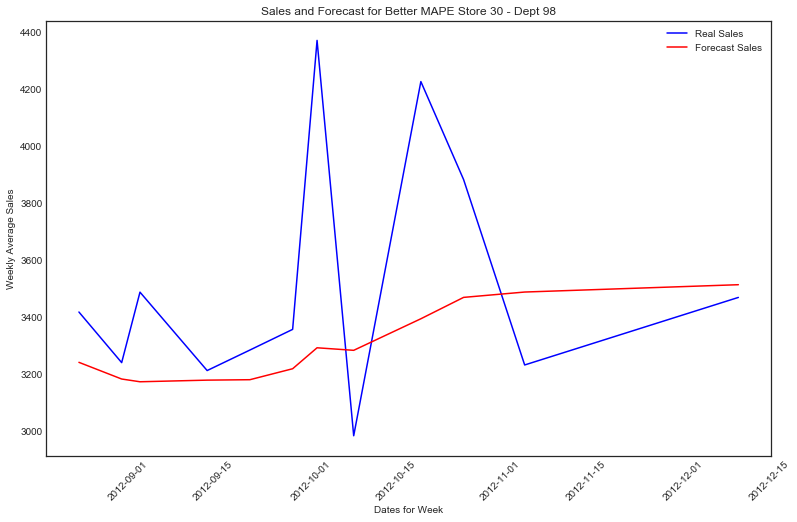

In [136]:
# Grafico Store 10 Depto 8
df_better = sales_forecast.query('Store == 30 & Dept == 98')
n = df_better.shape[0]
df_better = df_better.iloc[(n-12):n,:]

time = df_better['Date']
y = df_better['Weekly_Sales']
predict = df_better['Rolling_Mean']

# Plot things...
fig = plt.figure(figsize=(13,8))
plt.plot(time, y, 'b-')
plt.plot(time, predict, 'r-')
plt.xticks(rotation=45)
plt.legend(('Real Sales', 'Forecast Sales'))
plt.xlabel('Dates for Week')
plt.ylabel('Weekly Average Sales')
plt.title('Sales and Forecast for Better MAPE Store 30 - Dept 98')
plt.show();

# PROBLEMA 2

In [4]:
# Se crea funcion que calcula la distancia euclidiana entre dos puntos 
def dist(punto1,punto2):
    return np.sqrt(((punto1[0]-punto2[0])**2+(punto1[1]-punto2[1])**2))

In [25]:
# Construccion de Clase para Clusterizar
class Cluster:
    """
    Genera un objeto para un modelo lineal de mínimos cuadrados ordinarios.
        
    :param epsilon: Radio de Busqueda para la asignacion de Cluster.
    :param N: Cantidad de puntos minimos para construir un Cluster.
    :param lista: Almacena los puntos para asignacion de cluster.
    :param respaldo: Lista de respaldo para calculo interno.
    :param cluster: Alamcena los clusters asignados.
    """
    # PARTE A -------------------------------------------------
    def __init__(self,epsilon:float, N:int):
        self.epsilon= epsilon
        self.N=N
        self.lista=[] 
        self.respaldo=[]
        self.cluster=[]
    
    
    # PARTE B -------------------------------------------------
    def fit(self,df):
        for j in range(df.shape[0]):
            self.lista.append((df.iloc[j,0],df.iloc[j,1]))
            self.respaldo.append((df.iloc[j,0],df.iloc[j,1]))
        while len(self.lista)>0:
            b=self.lista.pop()
            l=[b]
            for e in l:
                for i in self.lista:
                    if dist(i,e)<=self.epsilon:
                        l.append(i)
                        self.lista.remove(i)
            if len(l)>=self.N:
                self.cluster.append(l) 
                
                
    # PARTE C -------------------------------------------------            
    def plot(self, save_plot = False, save_adress = None):
        """
        Grafica los puntos x,y 
        """
        for i in self.cluster:
            c1=np.random.random_sample()
            c2=np.random.random_sample()
            lista_x=[]
            lista_y=[]
            for j in range(len(i)):
                lista_x.append(i[j][0])
                lista_y.append(i[j][1])
            plt.scatter(lista_x,lista_y,facecolor=(c1,c2,.5))
            plt.title('Data Clustering')
            plt.xlabel('Coordenada X')
            plt.ylabel('Coordenada Y')
        if save_plot == True:
            path = save_adress
            path =+ '/Plot_Clusters.png'
            print('Saved plot to file "%s"' % path)
            plt.savefig(path, bbox_inches='tight')
            plt.show(); 
        else:
            plt.show()
            
            
    # PARTE D -------------------------------------------------            
    def predict(self,df):
        """
        ingrese la Base de datos
        """
        lista=[]
        
        for j in range(df.shape[0]):
            t=(df.iloc[j,0],df.iloc[j,1])
            distancia=self.epsilon+1
            nca=0
            for i in self.cluster:
                for e in i:
                    if dist(e,t)<distancia:
                        if dist(e,t)==0:
                            nca=self.cluster.index(i)
                            distancia=dist(e,t)
                            break
                            break
                        else:
                            distancia=dist(e,t)
                            nca=self.cluster.index(i)
            if distancia<=self.epsilon:
                lista.append([df.iloc[j,0],df.iloc[j,1],nca,distancia])
            elif distancia>self.epsilon:
                lista.append([df.iloc[j,0],df.iloc[j,1],"ninguno",distancia])
        lista_c=[]
        for i in self.cluster:
            c1=np.random_sample() 
            c2=np.random_sample()
            lista_x=[]
            lista_y=[]
            for j in range(len(i)):
                lista_x.append(i[j][0])
                lista_y.append(i[j][1])
            plt.scatter(lista_x,lista_y,marker="+",facecolor=(c1,c2,.5))
            lista_c.append((c1,c2,.5))
        for k in lista:
            if k[2]=="ninguno":
                plt.scatter(k[0],k[1],marker="*",facecolor=(0,0,0))
            else:
                plt.scatter(k[0],k[1],marker="x",facecolor=lista_c[k[2]])
        Data_n=pd.DataFrame(lista,columns=["X","Y","Cluster","Distancia"])
        print(Data_n)
        plt.show()

### PROBANDO LA CLASE CLUSTERS PARA LA DATA SPIRAL

In [10]:
# Aplicacion de la Clase asigna_cluster
spiral = pd.read_table('.\spiral.txt', header = None, delimiter = '\t')
spiral.columns = ['x', 'y', 'Cluster_Real']
spiral.head(10)

,x,y,Cluster_Real
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
5,28.05,5.00,3
6,27.20,4.55,3
7,26.35,4.15,3
8,25.40,3.85,3
9,24.60,3.60,3


In [29]:
spiral_clus = Cluster(2,1)

In [30]:
spiral_clus.fit(spiral)

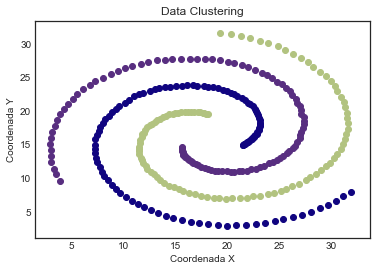

In [31]:
spiral_clus.plot(save_plot = False, save_adress = None)

In [15]:
np.random.random_sample()

0.440452041120733